Before getting started, import the necessary packages:

In [1]:
import glob
import os
import warnings

# import cv2  # Uncomment if you need cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import tensorflow  
# import pydicom
# from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.image import img_to_array, load_img
# from tqdm import tqdm
# import torch
# from torchvision import transforms
from IPython.display import Markdown, display

 # Import functions from the module
import importlib
import help_files._0_definitions 
import  help_files._1_visuals_script
# import  help_files._01_load_data
 # Reload the module to apply the changes to the script
importlib.reload(help_files._0_definitions)
importlib.reload(help_files._1_visuals_script)
# importlib.reload(help_files._01_load_data)
import  help_files._1_visuals_script  as pauls_vs

# Define the path
from pathlib import Path
# Define the path
path = Path('C:/Users/HP1/Desktop/Spiced/capstone-project/data')
path_vor = Path('C:/Users/HP1/Desktop/Spiced/capstone-project/data/vorlauf')

In [2]:
# Load the data from _01_load_data
file_names = ["X_train.csv", "X_train_coor.csv", "X_train_des.csv"]
dataframes = [pd.read_csv(path_vor / file_name) for file_name in file_names]
X_train, X_train_coor, X_train_des = dataframes

In [3]:
X_train.head()

study_id spinal_canal_stenosis_l1_l2 spinal_canal_stenosis_l2_l3   
0   4003253                 Normal/Mild                 Normal/Mild  \

  spinal_canal_stenosis_l3_l4 spinal_canal_stenosis_l4_l5   
0                 Normal/Mild                 Normal/Mild  \

  spinal_canal_stenosis_l5_s1 left_neural_foraminal_narrowing_l1_l2   
0                 Normal/Mild                           Normal/Mild  \

  left_neural_foraminal_narrowing_l2_l3 left_neural_foraminal_narrowing_l3_l4   
0                           Normal/Mild                           Normal/Mild  \

  left_neural_foraminal_narrowing_l4_l5  ... left_subarticular_stenosis_l1_l2   
0                              Moderate  ...                      Normal/Mild  \

  left_subarticular_stenosis_l2_l3 left_subarticular_stenosis_l3_l4   
0                      Normal/Mild                      Normal/Mild  \

  left_subarticular_stenosis_l4_l5 left_subarticular_stenosis_l5_s1   
0                         Moderate                      Normal/Mild  \

  right_subarticular_stenosis_l1_l2 right_subarticular_stenosis_l2_l3   
0                       Normal/Mild                       Normal/Mild  \

  right_subarticular_stenosis_l3_l4 right_subarticular_stenosis_l4_l5   
0                       Normal/Mild                       Normal/Mild  \

  right_subarticular_stenosis_l5_s1  
0                       Normal/Mild  

[1 rows x 26 columns]

In [4]:
X_train_des

study_id   series_id series_description
0   4003253   702807833   Sagittal T2/STIR
1   4003253  1054713880        Sagittal T1
2   4003253  2448190387           Axial T2

In [5]:
reshape_list = ['spinal_canal_stenosis_l1_l2', 'spinal_canal_stenosis_l2_l3', 'spinal_canal_stenosis_l3_l4', 'spinal_canal_stenosis_l4_l5', 'spinal_canal_stenosis_l5_s1', 'left_neural_foraminal_narrowing_l1_l2', 'left_neural_foraminal_narrowing_l2_l3', 'left_neural_foraminal_narrowing_l3_l4', 'left_neural_foraminal_narrowing_l4_l5', 'left_neural_foraminal_narrowing_l5_s1', 'right_neural_foraminal_narrowing_l1_l2', 'right_neural_foraminal_narrowing_l2_l3', 'right_neural_foraminal_narrowing_l3_l4', 'right_neural_foraminal_narrowing_l4_l5', 'right_neural_foraminal_narrowing_l5_s1', 'left_subarticular_stenosis_l1_l2', 'left_subarticular_stenosis_l2_l3', 'left_subarticular_stenosis_l3_l4', 'left_subarticular_stenosis_l4_l5', 'left_subarticular_stenosis_l5_s1', 'right_subarticular_stenosis_l1_l2', 'right_subarticular_stenosis_l2_l3', 'right_subarticular_stenosis_l3_l4', 'right_subarticular_stenosis_l4_l5', 'right_subarticular_stenosis_l5_s1']  
# Assuming df is your DataFrame
reshaped_train = pd.melt(X_train, 
                  id_vars=["study_id"],  # Keep study_id as is
                  var_name="categorie",  # New column for the condition names
                  value_name="severity")   # New column for the values

# Display the reshaped DataFrame
# Ensure the file is not open in another program and you have write permissions
# reshaped_train.to_csv(path / "starfor_sorting_new.csv",  index=False)
 
 
X_train = reshaped_train
X_train = X_train.sort_values(by=['study_id', 'categorie'], ignore_index=True)
X_train.head()

study_id                              categorie     severity
0   4003253  left_neural_foraminal_narrowing_l1_l2  Normal/Mild
1   4003253  left_neural_foraminal_narrowing_l2_l3  Normal/Mild
2   4003253  left_neural_foraminal_narrowing_l3_l4  Normal/Mild
3   4003253  left_neural_foraminal_narrowing_l4_l5     Moderate
4   4003253  left_neural_foraminal_narrowing_l5_s1  Normal/Mild

In [6]:
# Split the string into two parts: 'spinal_canal_stenosis' and 'l1_l2'
split_columns = X_train['categorie'].str.rsplit('_', n=2)
# Combine the first part as 'condition' and the last two parts as 'level'
X_train['condition'] = split_columns.str[0]
X_train['level'] = split_columns.str[1] + '_' + split_columns.str[2]

X_train 

study_id                               categorie     severity   
0    4003253   left_neural_foraminal_narrowing_l1_l2  Normal/Mild  \
1    4003253   left_neural_foraminal_narrowing_l2_l3  Normal/Mild   
2    4003253   left_neural_foraminal_narrowing_l3_l4  Normal/Mild   
3    4003253   left_neural_foraminal_narrowing_l4_l5     Moderate   
4    4003253   left_neural_foraminal_narrowing_l5_s1  Normal/Mild   
5    4003253        left_subarticular_stenosis_l1_l2  Normal/Mild   
6    4003253        left_subarticular_stenosis_l2_l3  Normal/Mild   
7    4003253        left_subarticular_stenosis_l3_l4  Normal/Mild   
8    4003253        left_subarticular_stenosis_l4_l5     Moderate   
9    4003253        left_subarticular_stenosis_l5_s1  Normal/Mild   
10   4003253  right_neural_foraminal_narrowing_l1_l2  Normal/Mild   
11   4003253  right_neural_foraminal_narrowing_l2_l3  Normal/Mild   
12   4003253  right_neural_foraminal_narrowing_l3_l4     Moderate   
13   4003253  right_neural_foraminal_narrowing_l4_l5     Moderate   
14   4003253  right_neural_foraminal_narrowing_l5_s1  Normal/Mild   
15   4003253       right_subarticular_stenosis_l1_l2  Normal/Mild   
16   4003253       right_subarticular_stenosis_l2_l3  Normal/Mild   
17   4003253       right_subarticular_stenosis_l3_l4  Normal/Mild   
18   4003253       right_subarticular_stenosis_l4_l5  Normal/Mild   
19   4003253       right_subarticular_stenosis_l5_s1  Normal/Mild   
20   4003253             spinal_canal_stenosis_l1_l2  Normal/Mild   
21   4003253             spinal_canal_stenosis_l2_l3  Normal/Mild   
22   4003253             spinal_canal_stenosis_l3_l4  Normal/Mild   
23   4003253             spinal_canal_stenosis_l4_l5  Normal/Mild   
24   4003253             spinal_canal_stenosis_l5_s1  Normal/Mild   

                           condition  level  
0    left_neural_foraminal_narrowing  l1_l2  
1    left_neural_foraminal_narrowing  l2_l3  
2    left_neural_foraminal_narrowing  l3_l4  
3    left_neural_foraminal_narrowing  l4_l5  
4    left_neural_foraminal_narrowing  l5_s1  
5         left_subarticular_stenosis  l1_l2  
6         left_subarticular_stenosis  l2_l3  
7         left_subarticular_stenosis  l3_l4  
8         left_subarticular_stenosis  l4_l5  
9         left_subarticular_stenosis  l5_s1  
10  right_neural_foraminal_narrowing  l1_l2  
11  right_neural_foraminal_narrowing  l2_l3  
12  right_neural_foraminal_narrowing  l3_l4  
13  right_neural_foraminal_narrowing  l4_l5  
14  right_neural_foraminal_narrowing  l5_s1  
15       right_subarticular_stenosis  l1_l2  
16       right_subarticular_stenosis  l2_l3  
17       right_subarticular_stenosis  l3_l4  
18       right_subarticular_stenosis  l4_l5  
19       right_subarticular_stenosis  l5_s1  
20             spinal_canal_stenosis  l1_l2  
21             spinal_canal_stenosis  l2_l3  
22             spinal_canal_stenosis  l3_l4  
23             spinal_canal_stenosis  l4_l5  
24             spinal_canal_stenosis  l5_s1

In [7]:
X_train['condition'] = X_train['condition'].str.replace('_', ' ')
X_train['level'] = X_train['level'].str.replace('_', '/')
X_train.head()


study_id                              categorie     severity   
0   4003253  left_neural_foraminal_narrowing_l1_l2  Normal/Mild  \
1   4003253  left_neural_foraminal_narrowing_l2_l3  Normal/Mild   
2   4003253  left_neural_foraminal_narrowing_l3_l4  Normal/Mild   
3   4003253  left_neural_foraminal_narrowing_l4_l5     Moderate   
4   4003253  left_neural_foraminal_narrowing_l5_s1  Normal/Mild   

                         condition  level  
0  left neural foraminal narrowing  l1/l2  
1  left neural foraminal narrowing  l2/l3  
2  left neural foraminal narrowing  l3/l4  
3  left neural foraminal narrowing  l4/l5  
4  left neural foraminal narrowing  l5/s1

In [8]:
X_train_coor['condition'] = X_train_coor['condition'].str.lower()
X_train_coor['level'] = X_train_coor['level'].str.lower()


In [9]:
X_train_coor

study_id   series_id  instance_number                         condition   
0    4003253   702807833                8             spinal canal stenosis  \
1    4003253   702807833                8             spinal canal stenosis   
2    4003253   702807833                8             spinal canal stenosis   
3    4003253   702807833                8             spinal canal stenosis   
4    4003253   702807833                8             spinal canal stenosis   
5    4003253  1054713880                4  right neural foraminal narrowing   
6    4003253  1054713880                4  right neural foraminal narrowing   
7    4003253  1054713880                5  right neural foraminal narrowing   
8    4003253  1054713880                6  right neural foraminal narrowing   
9    4003253  1054713880                6  right neural foraminal narrowing   
10   4003253  1054713880               11   left neural foraminal narrowing   
11   4003253  1054713880               11   left neural foraminal narrowing   
12   4003253  1054713880               11   left neural foraminal narrowing   
13   4003253  1054713880               12   left neural foraminal narrowing   
14   4003253  1054713880               12   left neural foraminal narrowing   
15   4003253  2448190387                3        left subarticular stenosis   
16   4003253  2448190387                4       right subarticular stenosis   
17   4003253  2448190387               11        left subarticular stenosis   
18   4003253  2448190387               11       right subarticular stenosis   
19   4003253  2448190387               19        left subarticular stenosis   
20   4003253  2448190387               19       right subarticular stenosis   
21   4003253  2448190387               28        left subarticular stenosis   
22   4003253  2448190387               28       right subarticular stenosis   
23   4003253  2448190387               35        left subarticular stenosis   
24   4003253  2448190387               35       right subarticular stenosis   

    level           x           y  
0   l1/l2  322.831858  227.964602  
1   l2/l3  320.571429  295.714286  
2   l3/l4  323.030303  371.818182  
3   l4/l5  335.292035  427.327434  
4   l5/s1  353.415929  483.964602  
5   l4/l5  187.961759  251.839388  
6   l5/s1  198.240918  285.613767  
7   l3/l4  187.227533  210.722753  
8   l1/l2  194.569790  127.755258  
9   l2/l3  191.632887  165.934990  
10  l1/l2  196.070671  126.021201  
11  l4/l5  186.504472  251.592129  
12  l5/s1  197.100569  289.457306  
13  l2/l3  191.321555  170.120141  
14  l3/l4  187.878354  217.245081  
15  l1/l2  179.126448  161.235521  
16  l1/l2  145.288771  158.624642  
17  l2/l3  180.979730  158.764479  
18  l2/l3  145.900042  157.096466  
19  l3/l4  176.037645  157.528957  
20  l3/l4  142.843690  156.179561  
21  l4/l5  172.948842  156.911197  
22  l4/l5  147.428217  158.013372  
23  l5/s1  179.744209  161.853282  
24  l5/s1  145.900042  161.375358

In [10]:
unique_study_ids_train = X_train['study_id'].nunique()
unique_study_ids_train_coor = X_train_coor['study_id'].nunique()

print(f"Number of unique study_id in X_train: {unique_study_ids_train}")
print(f"Number of unique study_id in X_train_coor: {unique_study_ids_train_coor}")

Number of unique study_id in X_train: 1
Number of unique study_id in X_train_coor: 1


In [11]:
 # get rid of persons with no coordinates
X_train = X_train[X_train['study_id'].isin(X_train_coor['study_id'])]


In [12]:
unique_study_ids_train = X_train['study_id'].nunique()
unique_study_ids_train_coor = X_train_coor['study_id'].nunique()

print(f"Number of unique study_id in X_train: {unique_study_ids_train}")
print(f"Number of unique study_id in X_train_coor: {unique_study_ids_train_coor}")

Number of unique study_id in X_train: 1
Number of unique study_id in X_train_coor: 1


In [13]:
# Perform a left join on multiple variables
merged_df = pd.merge(X_train, X_train_coor, on=['study_id', 'condition', 'level'], how='left')

# Display the merged DataFrame
merged_df.head()

study_id                              categorie     severity   
0   4003253  left_neural_foraminal_narrowing_l1_l2  Normal/Mild  \
1   4003253  left_neural_foraminal_narrowing_l2_l3  Normal/Mild   
2   4003253  left_neural_foraminal_narrowing_l3_l4  Normal/Mild   
3   4003253  left_neural_foraminal_narrowing_l4_l5     Moderate   
4   4003253  left_neural_foraminal_narrowing_l5_s1  Normal/Mild   

                         condition  level   series_id  instance_number   
0  left neural foraminal narrowing  l1/l2  1054713880               11  \
1  left neural foraminal narrowing  l2/l3  1054713880               12   
2  left neural foraminal narrowing  l3/l4  1054713880               12   
3  left neural foraminal narrowing  l4/l5  1054713880               11   
4  left neural foraminal narrowing  l5/s1  1054713880               11   

            x           y  
0  196.070671  126.021201  
1  191.321555  170.120141  
2  187.878354  217.245081  
3  186.504472  251.592129  
4  197.100569  289.457306

In [14]:
# Count total rows in each DataFrame before the merge
print(f"Rows in X_train: {len(X_train)}")
print(f"Rows in X_train_coor: {len(X_train_coor)}")

# Count total rows in the merged DataFrame
print(f"Rows in merged_df: {len(merged_df)}")

# Find out how many rows have missing values in columns from X_train_coor after the merge
# Assuming columns from X_train_coor start with a common prefix or are listed in a known list
columns_from_X_train_coor = [col for col in X_train_coor.columns if col not in ['study_id', 'condition', 'level']]
missing_rows = merged_df[columns_from_X_train_coor].isnull().all(axis=1).sum()

# Create a new DataFrame for study_ids with at least one row having missing values in columns from X_train_coor
missing_study_ids = merged_df[merged_df[columns_from_X_train_coor].isnull().any(axis=1)]['study_id'].unique()
missing_persons_df = merged_df[merged_df['study_id'].isin(missing_study_ids)]
missing_persons_df = missing_persons_df.sort_values(by=['study_id', 'categorie'], ignore_index=True)
 

print(f"Rows in merged_df without matching rows in X_train_coor: {missing_rows}")
print(f"Rows in merged_df with matches from X_train_coor: {len(merged_df) - missing_rows}")

Rows in X_train: 25
Rows in X_train_coor: 25
Rows in merged_df: 25
Rows in merged_df without matching rows in X_train_coor: 0
Rows in merged_df with matches from X_train_coor: 25


In [15]:
missing_persons_df.head()

Empty DataFrame
Columns: [study_id, categorie, severity, condition, level, series_id, instance_number, x, y]
Index: []

In [16]:


# drop rows with missing values in columns from X_train_coor

merged_df = merged_df.dropna(subset=columns_from_X_train_coor)

display(Markdown('<span style="color:red">later on to take it back to the original shape : 48692</span>'))

<span style="color:red">later on to take it back to the original shape : 48692</span>

In [17]:
merged_df

study_id                               categorie     severity   
0    4003253   left_neural_foraminal_narrowing_l1_l2  Normal/Mild  \
1    4003253   left_neural_foraminal_narrowing_l2_l3  Normal/Mild   
2    4003253   left_neural_foraminal_narrowing_l3_l4  Normal/Mild   
3    4003253   left_neural_foraminal_narrowing_l4_l5     Moderate   
4    4003253   left_neural_foraminal_narrowing_l5_s1  Normal/Mild   
5    4003253        left_subarticular_stenosis_l1_l2  Normal/Mild   
6    4003253        left_subarticular_stenosis_l2_l3  Normal/Mild   
7    4003253        left_subarticular_stenosis_l3_l4  Normal/Mild   
8    4003253        left_subarticular_stenosis_l4_l5     Moderate   
9    4003253        left_subarticular_stenosis_l5_s1  Normal/Mild   
10   4003253  right_neural_foraminal_narrowing_l1_l2  Normal/Mild   
11   4003253  right_neural_foraminal_narrowing_l2_l3  Normal/Mild   
12   4003253  right_neural_foraminal_narrowing_l3_l4     Moderate   
13   4003253  right_neural_foraminal_narrowing_l4_l5     Moderate   
14   4003253  right_neural_foraminal_narrowing_l5_s1  Normal/Mild   
15   4003253       right_subarticular_stenosis_l1_l2  Normal/Mild   
16   4003253       right_subarticular_stenosis_l2_l3  Normal/Mild   
17   4003253       right_subarticular_stenosis_l3_l4  Normal/Mild   
18   4003253       right_subarticular_stenosis_l4_l5  Normal/Mild   
19   4003253       right_subarticular_stenosis_l5_s1  Normal/Mild   
20   4003253             spinal_canal_stenosis_l1_l2  Normal/Mild   
21   4003253             spinal_canal_stenosis_l2_l3  Normal/Mild   
22   4003253             spinal_canal_stenosis_l3_l4  Normal/Mild   
23   4003253             spinal_canal_stenosis_l4_l5  Normal/Mild   
24   4003253             spinal_canal_stenosis_l5_s1  Normal/Mild   

                           condition  level   series_id  instance_number   
0    left neural foraminal narrowing  l1/l2  1054713880               11  \
1    left neural foraminal narrowing  l2/l3  1054713880               12   
2    left neural foraminal narrowing  l3/l4  1054713880               12   
3    left neural foraminal narrowing  l4/l5  1054713880               11   
4    left neural foraminal narrowing  l5/s1  1054713880               11   
5         left subarticular stenosis  l1/l2  2448190387                3   
6         left subarticular stenosis  l2/l3  2448190387               11   
7         left subarticular stenosis  l3/l4  2448190387               19   
8         left subarticular stenosis  l4/l5  2448190387               28   
9         left subarticular stenosis  l5/s1  2448190387               35   
10  right neural foraminal narrowing  l1/l2  1054713880                6   
11  right neural foraminal narrowing  l2/l3  1054713880                6   
12  right neural foraminal narrowing  l3/l4  1054713880                5   
13  right neural foraminal narrowing  l4/l5  1054713880                4   
14  right neural foraminal narrowing  l5/s1  1054713880                4   
15       right subarticular stenosis  l1/l2  2448190387                4   
16       right subarticular stenosis  l2/l3  2448190387               11   
17       right subarticular stenosis  l3/l4  2448190387               19   
18       right subarticular stenosis  l4/l5  2448190387               28   
19       right subarticular stenosis  l5/s1  2448190387               35   
20             spinal canal stenosis  l1/l2   702807833                8   
21             spinal canal stenosis  l2/l3   702807833                8   
22             spinal canal stenosis  l3/l4   702807833                8   
23             spinal canal stenosis  l4/l5   702807833                8   
24             spinal canal stenosis  l5/s1   702807833                8   

             x           y  
0   196.070671  126.021201  
1   191.321555  170.120141  
2   187.878354  217.245081  
3   186.504472  251.592129  
4   197.100569  289.457306  
5   179.126448  161.235521  
6   180.979730  158.764479  


In [ ]:
X_train_des

In [18]:
s

NameError: name 's' is not defined

In [35]:
import re

def generate_image_paths(df, data_dir):
    image_paths = []
    for study_id, series_id in zip(df['study_id'], df['series_id']):
        study_dir = os.path.join(data_dir, str(study_id))
        series_dir = os.path.join(study_dir, str(series_id))
        
        # List images in the series directory
        images = os.listdir(series_dir)
        # Create full paths for each image
        image_paths.extend([os.path.join(series_dir, img) for img in images])
        
    return image_paths

 
# Assuming your previous functions and imports are already in place
# Generate image paths for train and test data
train_image_paths = generate_image_paths(X_train_des, os.path.join("data/train_images"))
# Sort the image paths to ensure numerical order
def numerical_sort(value):
    parts = re.split(r'(\d+)', value)
    return [int(part) if part.isdigit() else part for part in parts]

train_image_paths = sorted(train_image_paths, key=numerical_sort)
 # Print to verify paths
print("Train Image Paths:")
print(train_image_paths)  # Print the first 5 sorted train image paths


Train Image Paths:
['data/train_images\\4003253\\702807833\\1.dcm', 'data/train_images\\4003253\\702807833\\2.dcm', 'data/train_images\\4003253\\702807833\\3.dcm', 'data/train_images\\4003253\\702807833\\4.dcm', 'data/train_images\\4003253\\702807833\\5.dcm', 'data/train_images\\4003253\\702807833\\6.dcm', 'data/train_images\\4003253\\702807833\\7.dcm', 'data/train_images\\4003253\\702807833\\8.dcm', 'data/train_images\\4003253\\702807833\\9.dcm', 'data/train_images\\4003253\\702807833\\10.dcm', 'data/train_images\\4003253\\702807833\\11.dcm', 'data/train_images\\4003253\\702807833\\12.dcm', 'data/train_images\\4003253\\702807833\\13.dcm', 'data/train_images\\4003253\\702807833\\14.dcm', 'data/train_images\\4003253\\702807833\\15.dcm', 'data/train_images\\4003253\\1054713880\\1.dcm', 'data/train_images\\4003253\\1054713880\\2.dcm', 'data/train_images\\4003253\\1054713880\\3.dcm', 'data/train_images\\4003253\\1054713880\\4.dcm', 'data/train_images\\4003253\\1054713880\\5.dcm', 'data/tra

Visualizing Original Training Images:


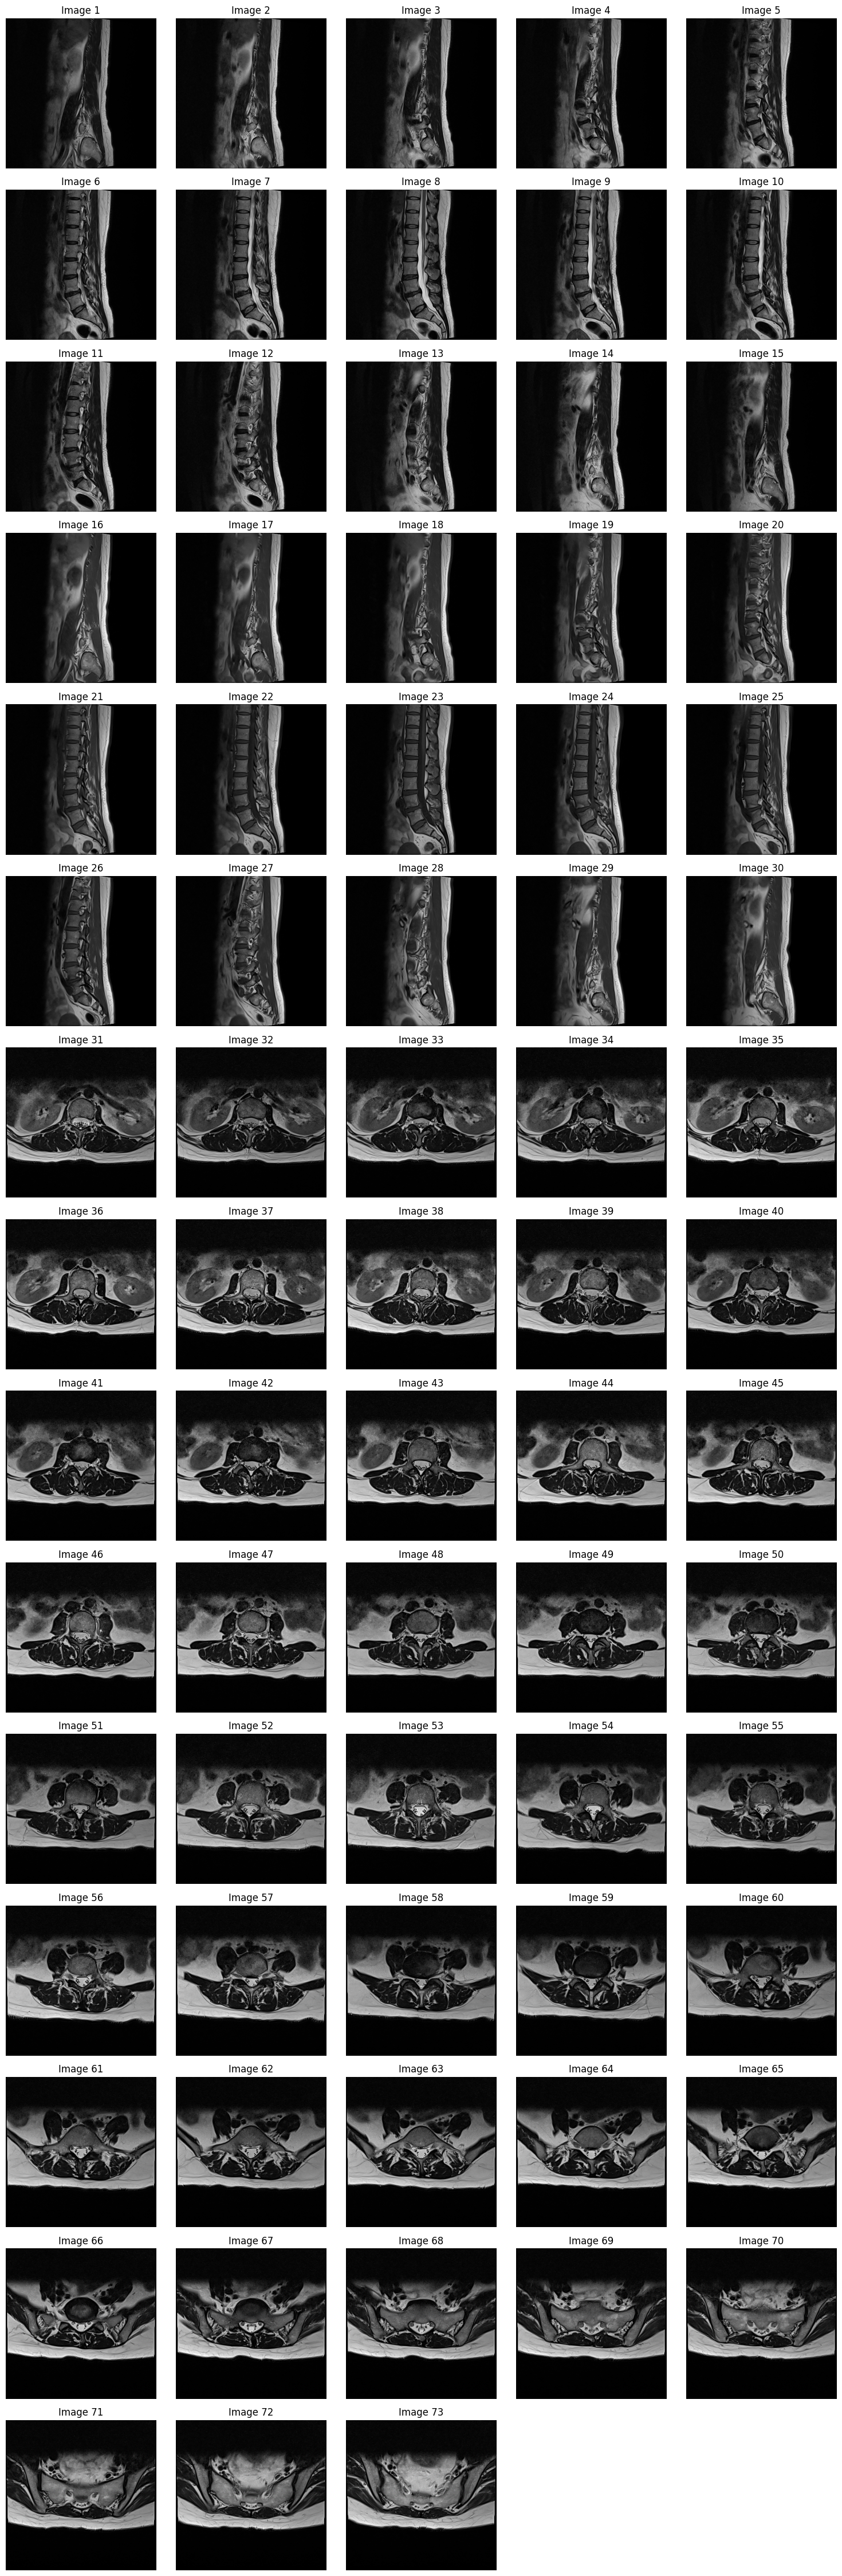

In [36]:
 
import matplotlib.pyplot as plt
import SimpleITK as sitk
from PIL import Image

# Function to visualize a set of images
def visualize_images(image_paths, num_images=5):
    # Set the number of images per row
    images_per_row = 5
    
    # Calculate the number of rows needed
    num_rows = (num_images + images_per_row - 1) // images_per_row  # This ensures enough rows for all images
    
    plt.figure(figsize=(images_per_row * 3, num_rows * 3))  # Adjust the figure size based on rows and columns
     
    # Ensure we don't try to plot more images than available
    num_images = min(num_images, len(image_paths))
    
    # Loop through the number of images to display
    for i in range(num_images):
        # Load the DICOM image using SimpleITK
        image = sitk.ReadImage(image_paths[i])
        image_array = sitk.GetArrayFromImage(image)  # Convert to NumPy array
        image_array = np.squeeze(image_array)  # Remove single-dimensional entries
        
        # Convert NumPy array to PIL Image
        pil_image = Image.fromarray(image_array)

        # Calculate the subplot position
        plt.subplot(num_rows, images_per_row, i + 1)  # Update to use num_rows and images_per_row
        plt.imshow(pil_image, cmap='gray')  # Display as grayscale
        plt.axis('off')  # Hide axis
        plt.title(f'Image {i + 1}')
    
    plt.tight_layout()
    plt.show()

# Visualize original training images
print("Visualizing Original Training Images:")
visualize_images(train_image_paths, num_images=135)

Visualizing Original Training Images:


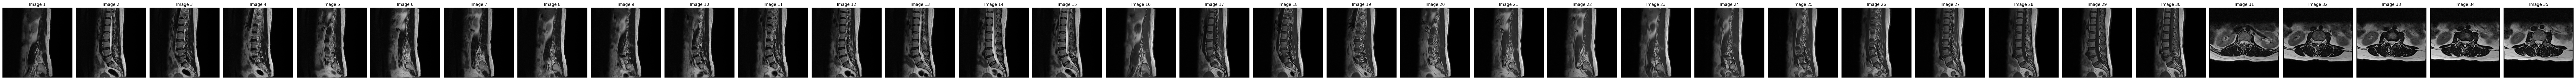

In [30]:
import matplotlib.pyplot as plt
import SimpleITK as sitk
from PIL import Image

# Function to visualize a set of images
def visualize_images(image_paths, num_images=5):
    plt.figure(figsize=(num_images * 3, 10))
     
    # Ensure we don't try to plot more images than available
    num_images = min(num_images, len(image_paths))
    # Loop through the number of images to display
    for i in range(num_images):
        # Load the DICOM image using SimpleITK
        image = sitk.ReadImage(image_paths[i])
        image_array = sitk.GetArrayFromImage(image)  # Convert to NumPy array
        image_array = np.squeeze(image_array)  # Remove single-dimensional entries
        
        # Convert NumPy array to PIL Image
        pil_image = Image.fromarray(image_array)

        # Plotting the original image
        plt.subplot(1, num_images, i + 1)
        plt.imshow(pil_image, cmap='gray')  # Display as grayscale
        plt.axis('off')  # Hide axis
        plt.title(f'Image {i + 1}')
    
    plt.tight_layout()
    plt.show()

# Visualize original training images
print("Visualizing Original Training Images:")
visualize_images(train_image_paths, num_images=35)

 


In [93]:
import os


ModuleNotFoundError: No module named 'SimpleITK'